In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('./DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

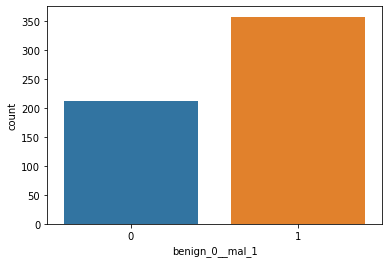

In [7]:
sns.countplot(x = 'benign_0__mal_1', data = df)

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

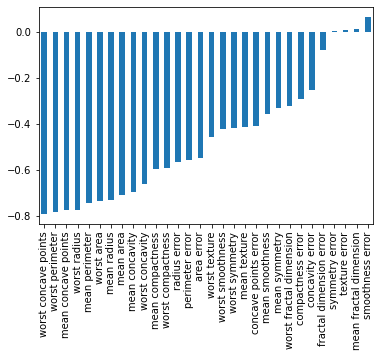

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<AxesSubplot:>

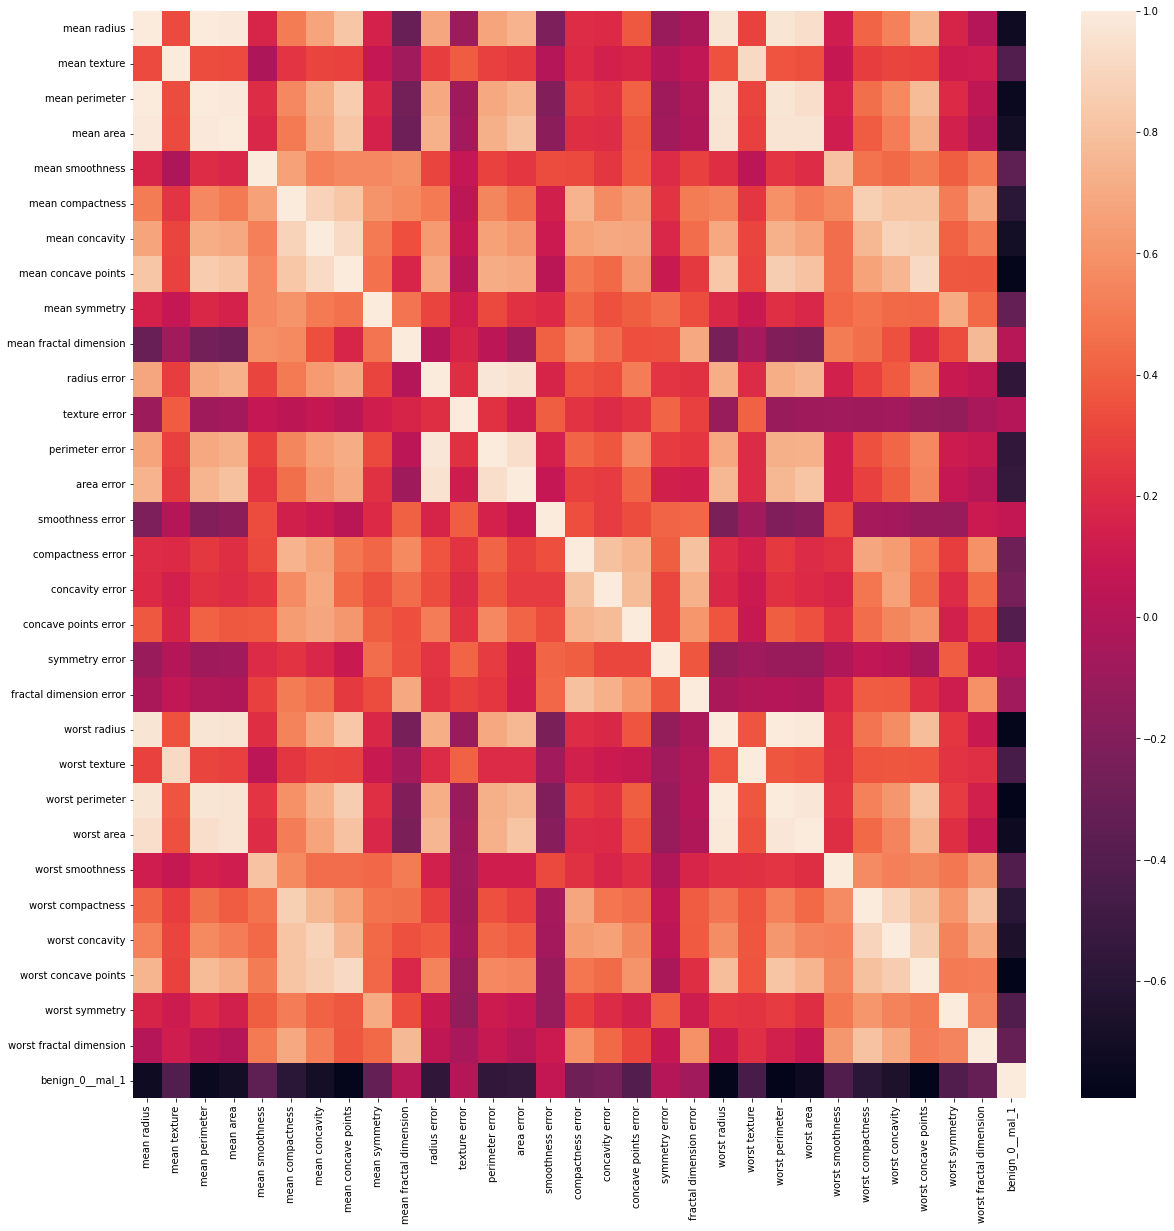

In [15]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr())

In [16]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential 

In [24]:
from tensorflow.keras.layers import Dense, Dropout

In [25]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION 
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [28]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6728 - val_loss: 0.6499
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6332 - val_loss: 0.6099
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5925 - val_loss: 0.5678
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5505 - val_loss: 0.5219
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5033 - val_loss: 0.4721
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4554 - val_loss: 0.4214
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4094 - val_loss: 0.3735
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3664 - val_loss: 0.3365
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3314 - val_loss: 0.3001
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3054 - val_loss: 0.2735
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.1176
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.1133
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.1183
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1161
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.1160
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1213
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.1216
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1181
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.1186
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.1194
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.1563
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0405 - val_loss: 0.1338
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0462 - val_loss: 0.1430
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0416 - val_loss: 0.1305
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0424 - val_loss: 0.1451
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0428 - val_loss: 0.1356
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0415 - val_loss: 0.1424
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0399 - val_loss: 0.1356
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0394 - val_loss: 0.1458
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0409 - val_loss: 0.1413
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0355 - val_loss: 0.1681
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0341 - val_loss: 0.1654
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0336 - val_loss: 0.1667
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.1597
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.1691
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 0.1669
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.1646
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1654
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0406 - val_loss: 0.1576
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0323 - val_loss: 0.1762
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0287 - val_loss: 0.1849
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.1906
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0266 - val_loss: 0.1817
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.1812
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0292 - val_loss: 0.1987
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0291 - val_loss: 0.1968
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.1815
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.1914
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0349 - val_loss: 0.2092
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1916
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.2173
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0259 - val_loss: 0.2076
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0251 - val_loss: 0.2109
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.1972
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.2236
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.2131
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.2006
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.2251
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.2050
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.2279
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.2404
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.2445
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.2438
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.2406
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.2423
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.2479
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.2308
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.2685
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.2404
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.2470
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.2878
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.2652
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.2755
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.2861
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.2795
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.2994
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.2690
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.2830
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.3068
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.2575
Epoc

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,val_loss
0,0.672822,0.649907
1,0.633169,0.609882
2,0.592549,0.567797
3,0.550481,0.521928
4,0.503331,0.472066


<AxesSubplot:>

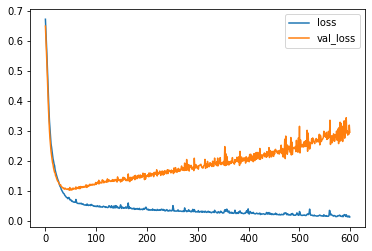

In [31]:
losses.plot()

In [32]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION 
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 25)

In [36]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), 
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6777 - val_loss: 0.6523
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6304 - val_loss: 0.6074
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5868 - val_loss: 0.5622
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5395 - val_loss: 0.5116
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4817 - val_loss: 0.4418
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4336 - val_loss: 0.3939
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3838 - val_loss: 0.3532
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3443 - val_loss: 0.3154
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3146 - val_loss: 0.2855
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2887 - val_loss: 0.2607
Epoch 11/

<AxesSubplot:>

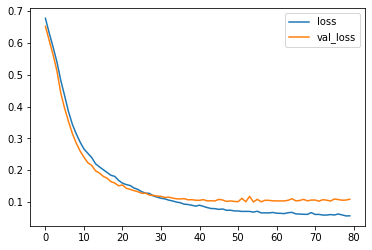

In [37]:
model_loss = pd.DataFrame(model.history.history) 
model_loss.plot()

In [38]:
from tensorflow.keras.layers import Dropout

In [39]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION 
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [40]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), 
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7031 - val_loss: 0.6851
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6791 - val_loss: 0.6659
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6701 - val_loss: 0.6452
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6550 - val_loss: 0.6231
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6435 - val_loss: 0.6059
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6097 - val_loss: 0.5793
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5831 - val_loss: 0.5496
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5725 - val_loss: 0.5173
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5364 - val_loss: 0.4836
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5296 - val_loss: 0.4591
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1247 - val_loss: 0.1029
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1142 - val_loss: 0.1064
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0911 - val_loss: 0.1021
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1034 - val_loss: 0.0992
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0953 - val_loss: 0.0967
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0929 - val_loss: 0.0979
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1115 - val_loss: 0.1006
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0936 - val_loss: 0.1111
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1133 - val_loss: 0.1098
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1030 - val_loss: 0.1013
Epoch 93/600


In [41]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

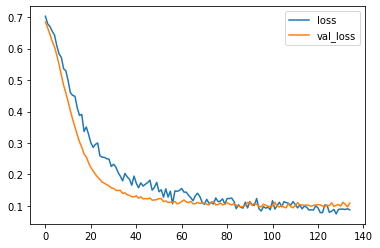

In [42]:
model_loss.plot()

In [45]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [46]:
from sklearn.metrics import classification_report, confusion_matrix 

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [48]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 4 84]]
